In [1]:
from google.colab import drive
drive.mount('/content/drive')
%pushd "/content/drive/My Drive/MSSP-607/Modules/Week_10"

Mounted at /content/drive
/content/drive/My Drive/MSSP-607/Modules/Week_10


['/content']

In [2]:
import pandas as pd
import networkx as nx

In [3]:
students_df = pd.read_csv('students.csv')

connections_df = pd.read_csv('connections.csv')

In [6]:
G = nx.Graph()

for index, row in students_df.iterrows():
    G.add_node(row['Name'], Age=row['Age'], Gender=row['Gender'], Major=row['Major'])
G = nx.Graph()

for index, row in students_df.iterrows():
    G.add_node(row['Name'], Age=row['Age'], Gender=row['Gender'], Major=row['Major'])

for index, row in connections_df.iterrows():
    G.add_edge(row['Student_ID_1'], row['Student_ID_2'])

In [7]:
degree_centrality = nx.degree_centrality(G)

clustering_coefficient = nx.clustering(G)

shortest_path_length = nx.shortest_path_length(G)

In [8]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)

In [10]:
print("Degree Centrality:", degree_centrality)
print("Clustering Coefficient:", clustering_coefficient)
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

try:
    shortest_path_length_1_4 = shortest_path_lengths[1][4]
    print("Shortest Path Length between nodes 1 and 4:", shortest_path_length_1_4)
except KeyError:
    print("No path found between nodes 1 and 4.")
print("Communities:", communities)

Degree Centrality: {'Wenjing Wu': 0.0, 'Jingrong Wang': 0.0, 'Qian Liu': 0.0, 'Jingqi Wang': 0.0, 1: 0.42857142857142855, 2: 0.42857142857142855, 3: 0.42857142857142855, 4: 0.42857142857142855}
Clustering Coefficient: {'Wenjing Wu': 0, 'Jingrong Wang': 0, 'Qian Liu': 0, 'Jingqi Wang': 0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
Shortest Path Length between nodes 1 and 4: 1
Communities: [frozenset({1, 2, 3, 4}), frozenset({'Wenjing Wu'}), frozenset({'Jingrong Wang'}), frozenset({'Qian Liu'}), frozenset({'Jingqi Wang'})]


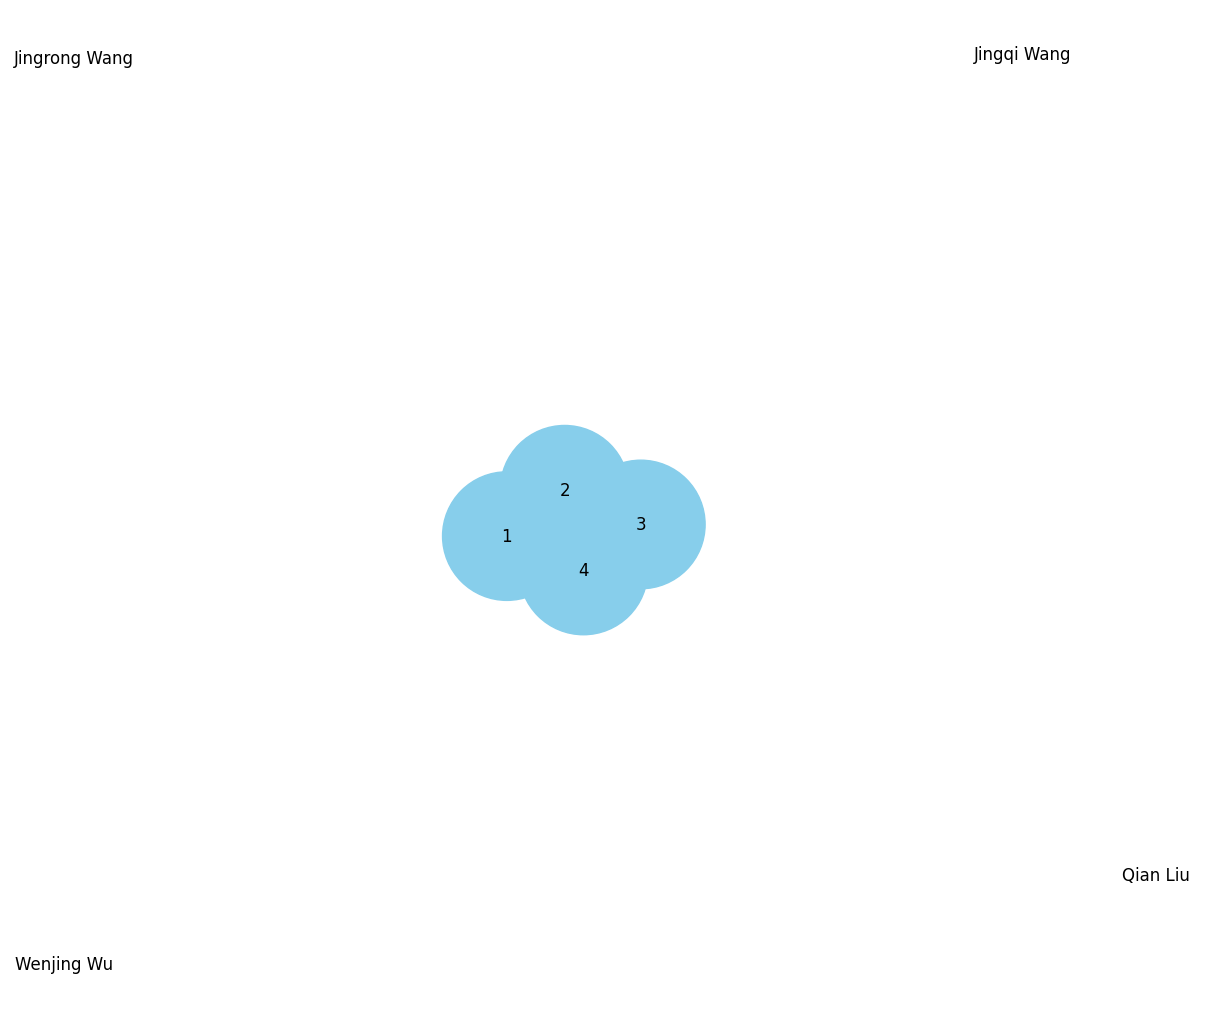

In [24]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=[degree_centrality[node]*20000 for node in G])
plt.show()

<ipython-input-27-cc32734bb20e>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(communities))


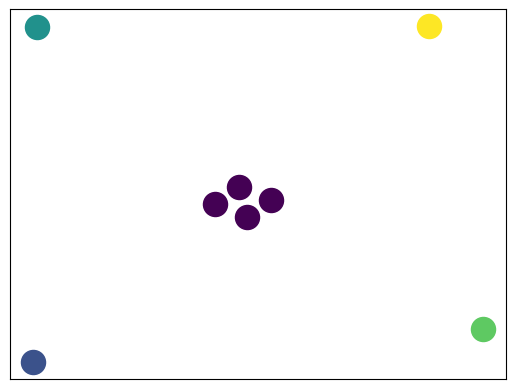

In [27]:
colors = ['red', 'blue', 'green']
cmap = plt.cm.get_cmap('viridis', len(communities))
for i, comm in enumerate(communities):
       color = cmap(i)  # Get a color from the colormap based on the community index
       nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_color=[color]) # Pass color as a list

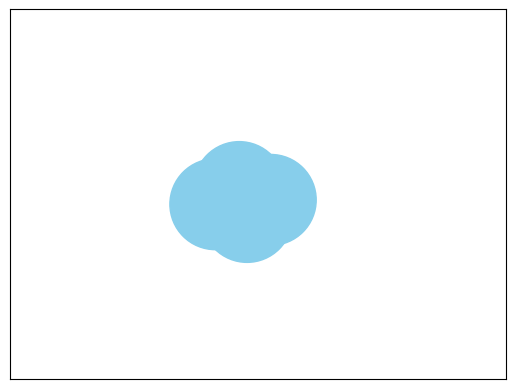

In [28]:
sizes = [degree_centrality[node]*10000 for node in G]
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='skyblue', node_size=sizes)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()